# Принятие решений в бизнесе 

Перед нами данные и таблицы крупного интернет-магазина. Вместе с отделом маркетинга нужно подготовить список гипотез для увеличения выручки.

*Задачи:*

1) Приоритизировать гипотезы

        a) Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета. 
   
        б) Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
   
        в) Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

2) Запустить A/B-тест и выполнить все шаги для его интерпретации.

   Покупателей в интернет-магазине разделили на группы А и Б. Тест нужно провести, чтобы проверить две гипотезы. 
   
   Н0: Между группами А и В нет различий.
   
   Н1: Между группами А и В различия есть.
   
   Чтобы проверить это, будут предприняты следующие шаги:
   
       а) Построены графики среднего чека и среднего количества заказов в группах А и В.
   
       б) Построены графики отношения двух указанных метрик между группами для определения лидера, если таковой будет.
   
       в) Очистка данных от аномалий, если такие будут.
   
       г) Построены графики среднего чека и среднего количества заказов в группах А и В для очищенных данных, а так же показаны графики отношения этих параметров между группами.
  
 

3) Проанализировать результаты

# Часть 1. Приоритизация гипотез.

**Загрузите данные**

In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 100
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.columns = [x.lower().replace(' ', '_') for x in data.columns]
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE**

In [5]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
data_grouped = data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)
data_grouped

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Применим фреймворк RICE**

In [6]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
data_grouped_2 = data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)
data_grouped_2 

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


1. ICE (Impact, Confidence, Effort) оценивает задачи или идеи на основе их потенциального влияния, уверенности в оценке  и трудозатратности. Каждый критерий оценивается по десятибалльной шкале, и потом все оценки суммируются для получения общей оценки приоритета.

2. RICE (Reach, Impact, Confidence, Effort) также оценивает задачи или идеи на основе их охвата, потенциального влияния , уверенности в оценке  и трудозатратности. Разница между RICE и ICE заключается в том, что RICE также учитывает охват целевой аудитории (reach), в отличие от ICE.



В лидеры, после оценки RICE, сразу выбились гипотезы, у которых высокий показатель охвата. Это изменило приоритизацию гипотез и показало нам картину, отличную от показателей  ICE.
Можно выделить лидеров среди гипотез для обоих вариантов сортировок. Эта гипотезы 7 и 0. Они в тройке лидеров в обоих таблицах, поэтому на них можно сосредоточить свое внимание. 

# Часть 2. Анализ A/B-теста

До начала теста зададим гипотезы.

Н0: Между группами А и В нет различий.
    
Н1: Между группами А и В различия есть.

**1.Построим график кумулятивной выручки по группам.**

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders = orders.rename(columns={'transactionId': 'transaction_id','visitorId':'visitor_id'})

In [10]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Проверим количество групп в обеих таблицах

In [11]:
number_of_groups = orders['group'].nunique()
number_of_groups

2

In [12]:
number_of_groups_new = visitors['group'].unique()
number_of_groups_new 

array(['A', 'B'], dtype=object)

Проверим даты проведения эксперемента.

In [13]:
min_date = orders['date'].min()
min_date 

Timestamp('2019-08-01 00:00:00')

In [14]:
max_date = orders['date'].max()
max_date

Timestamp('2019-08-31 00:00:00')

In [15]:
min_date_new = visitors['date'].min()
min_date_new 

Timestamp('2019-08-01 00:00:00')

In [16]:
max_date_new = visitors['date'].max()
max_date_new

Timestamp('2019-08-31 00:00:00')

Проверим количество пользователей в каждой группе.

In [17]:
orders['visitor_id'].count()

1197

In [18]:
group_varify_a = orders.query('group== "A"')
group_varify_a['visitor_id'].count()

557

In [19]:
group_varify_b = orders.query('group== "B"')
group_varify_b['visitor_id'].count()

640

Разница между группами есть, но она не очень существенна. Хотя, после анализа данных и нахождения аномалий группы могут показать более схожие результаты по количеству пользователей.

Найдем вероятность попадания пользователей в обе группы.

In [20]:
# Найдем пользователей, которые есть в обеих группах
users_in_both_groups = orders[orders['group']=='A']['visitor_id'].isin(orders[orders['group']=='B']['visitor_id'])

In [21]:
# Посчитаем количество таких пользователей
num_users_in_both_groups = users_in_both_groups.sum()
num_users_in_both_groups

89

In [22]:
# Рассчитаем вероятность
probability = num_users_in_both_groups / len(orders['visitor_id'].unique())
print('Вероятность попадания в обе группы: ' + str(round(probability*100, 2)) + '%')

Вероятность попадания в обе группы: 8.63%





Вероятность попадания в обе группы меньше 10 процентов, 8.63%. Шанс не очень высок.

Объединим таблицы в одну общую, а так же удалим дубликаты.

In [23]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }),axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1).sort_values(by=['date', 'group'])

cumulative_data = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data.query('group == "A"')[['date', 'revenue', 'orders']]
cumulative_revenue_a

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109
10,2019-08-06,598401,127
12,2019-08-07,740818,145
14,2019-08-08,837097,161
16,2019-08-09,1025603,177
18,2019-08-10,1236098,193


In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data.query('group == "B"')[['date', 'revenue', 'orders']]
cumulative_revenue_b

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101
11,2019-08-06,824337,129
13,2019-08-07,1049671,153
15,2019-08-08,1270589,180
17,2019-08-09,1431401,205
19,2019-08-10,1539203,228


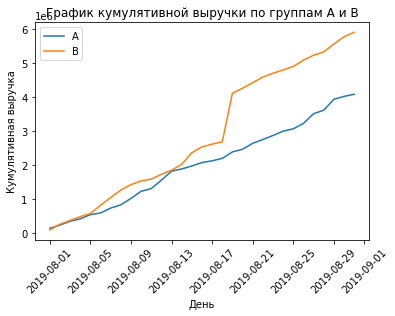

In [26]:
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам A и B')
plt.xlabel('День')
plt.ylabel('Кумулятивная выручка')
plt.legend() 
warnings.filterwarnings('ignore')

Судя по графику кумулятивной выручки, уверенно лидирует группа В. Одинаковый старт в начале, но потом группа B вырвалась вперед с большим отрывом. Так же у группы B наблюдается скачек в середине месяца, это может быть вызвано аномально большими заказами, но чтобы подтвердить эту гипотезу, нужно продложить анализировать данные.

**2.Построим график кумулятивного среднего чека по группам.**

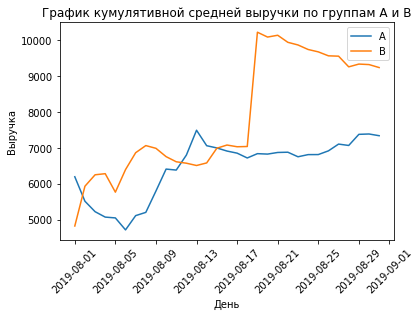

In [27]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('График кумулятивной средней выручки по группам A и B')
plt.xlabel('День')
plt.ylabel('Выручка')
plt.legend() 
warnings.filterwarnings('ignore')

В целом, средний чек выше у группы В, чем у группы А. На небольшом участке графика группа А лидрировала, но потом снова группа В взяла верх. Резкий подъем графика у группы В может говорить о том, что в статискику подмешались выбросы, какие то аномально большие значения, которые могли привести к такому результату. Выводы делать рано, но если рассматривать этот график изолировано, то группа В заняла лидирующую позицию.

**3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A.** 

In [28]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
merged_cumulative_revenue

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


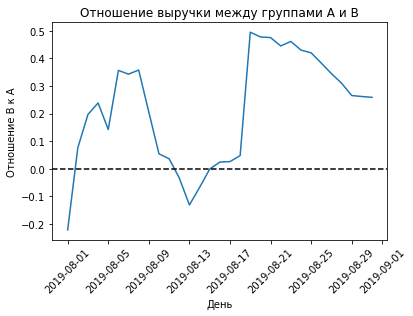

In [29]:
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)
plt.xticks(rotation=45)
plt.title('Отношение выручки между группами A и B')
plt.xlabel('День')
plt.ylabel('Отношение В к А')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
warnings.filterwarnings('ignore')

Судя по этому графику, группа B стабильно лучше группы A по конверсии, и различие увеличивается со временем. Только в одном участке график просидает в сторону группы А, но потом стремительно возрастает. В целом можно наблюдать, что конверсия группы В лучше, чем у группы А.

**4.Построим график кумулятивного среднего количества заказов на посетителя по группам**

In [30]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [31]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data.query('group == "A"')
# отделяем данные по группе B
cumulative_data_b = cumulative_data.query('group == "B"')

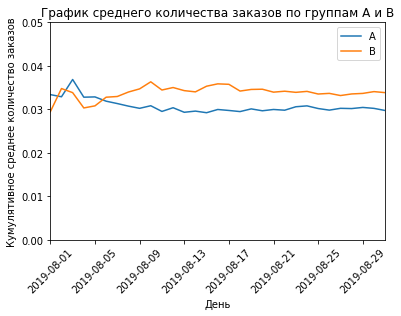

In [32]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xticks(rotation=45)
plt.title('График среднего количества заказов по группам A и B')
plt.xlabel('День')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
warnings.filterwarnings('ignore')

Судя по этому графику, количество заказов так же выше у группы В. В начале теста были колебания, но потом ситуация стабилизировалась, и обе группы имеют четкую тенденцию.

**5.Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

In [33]:
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
merged_сumulative_сonversions # сделаем общую таблицу

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


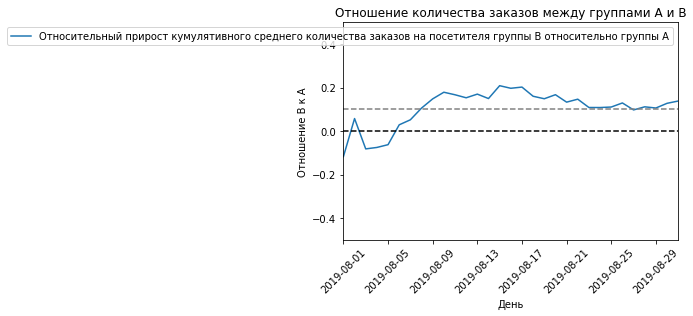

In [34]:
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversion_b']/merged_сumulative_сonversions['conversion_a']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.xticks(rotation=45)
plt.title('Отношение количества заказов между группами A и B')
plt.xlabel('День')
plt.ylabel('Отношение В к А')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.5, 0.5])
warnings.filterwarnings('ignore')

Судя по графику, можно сделать вывод, что количество заказов в группе В гораздо больше, чем в группе А. В среднем, начиная с 7 августа, количество заказов в группе В на 10 процентов выше, чем в группе А, а иногда эта цифра поднимается даже до 20 процентов.

**6.Постройте точечный график количества заказов по пользователям.**

In [35]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False)
orders_by_users

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


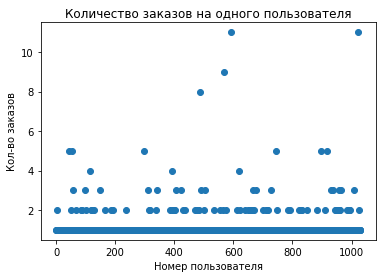

In [36]:
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Количество заказов на одного пользователя')
plt.xlabel('Номер пользователя')
plt.ylabel('Кол-во заказов')
warnings.filterwarnings('ignore')

Судя по графику, большинство пользователей делают заказы до 2 штук включительно. Больше заказов делают гораздо меньший процент пользователей. Сейчас мы найдем этот процент.

**7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [37]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Получается, что больше 2 заказов делают лишь 5 процентов пользователей, а больше 4 заказов только 1 процент. Можно сделать вывод, что более двух заказов на одного пользователя явлется аномалией, и ее можно исключить из расчетов. 

**8.Постройте точечный график стоимостей заказов.**

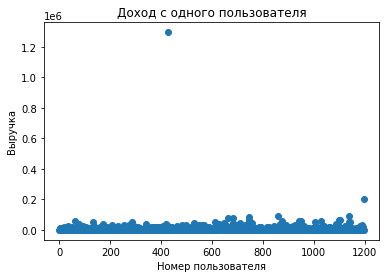

In [38]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Доход с одного пользователя')
plt.xlabel('Номер пользователя')
plt.ylabel('Выручка')
warnings.filterwarnings('ignore')

**9.Посчитайте 95-й и 99-й перцентили стоимости заказов.**

In [39]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Судя по графику и по перцетилям, только 5 процентов пользователей делают заказы больше, чем 28000, и только 1 процент больше, чем 58 тысяч. Иногда появляются выбросы в 1.2 миллиона, но они редки. 
Можно сделать вывод, что более 28000 это аномалии, и не рассматривать их в исследовании.

**10.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Повторим гипотезы.

Н0: Между группами А и В нет различий.

Н1: Между группами А и В различия есть.

Создадим таблицу из пользоватей группы А по дням.

In [40]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}),axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']
visitors_a_cummulative

,date,visitors_cummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318
5,2019-08-06,3985
6,2019-08-07,4629
7,2019-08-08,5239
8,2019-08-09,5856
9,2019-08-10,6262


Тоже самое сделаем для пользователей группы В.

In [41]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}),axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']
visitors_b_cummulative

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280
36,2019-08-06,3935
37,2019-08-07,4644
38,2019-08-08,5298
39,2019-08-09,5908
40,2019-08-10,6277


Сделаем таблицу с количеством заказов и суммарной выручкой с пользователя для группа А.

In [42]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}),axis=1).sort_values(by=['date'])

orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a']
orders_a_cummulative

,date,orders_cummulative_a,revenue_cummulative_a
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917
5,2019-08-06,127,598401
6,2019-08-07,145,740818
7,2019-08-08,161,837097
8,2019-08-09,177,1025603
9,2019-08-10,193,1236098


Похожее сделаем с группой В.

In [43]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),axis=1).sort_values(by=['date'])

orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b']
orders_b_cummulative

,date,orders_cummulative_b,revenue_cummulative_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995
5,2019-08-06,129,824337
6,2019-08-07,153,1049671
7,2019-08-08,180,1270589
8,2019-08-09,205,1431401
9,2019-08-10,228,1539203


Объединим две таблицы в одну.

In [44]:
data_common = (
   orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left'))
data_common

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


Сгруппируем данные по пользователям и заказам для групп А и В.

In [45]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_a.columns = ['user_id', 'orders']
orders_by_users_a

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [46]:
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_b.columns = ['user_id', 'orders']
orders_by_users_b

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


Объявим переменные sample_a и sample_в, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Переменная sample_a должна состоять из двух частей: Список с количеством заказов для каждого из пользователей и нули для пользователей, которые ничего не заказывали.

In [47]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_common['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

In [48]:
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_common['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)
sample_b

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

В sample_а сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sample_а — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sample_а методом mean(). Аналогично найдём среднее группы B.

Посчитаем р-значение, то есть статистическую значимость.

In [38]:
p_value = st.mannwhitneyu(sample_a, sample_b)[1]
p_value.round(5)

0.01679

Посчитаем, насколько велико отношение между группами.

In [52]:
avg_diff = sample_b.mean() / sample_a.mean() - 1
avg_diff.round(3)

0.138

P-value вышло 0.016, что меньше значимого уровня в 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%

**11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

In [40]:
p_value_avg_bill = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
p_value_avg_bill.round(3)

0.729

In [41]:
avg_diff_bill = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
avg_diff_bill.round(3)

0.259

P-value значительно больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.

Относительное различие среднего чека между сегментами почти 26%

**12.Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Будем считать больше 2 заказов на человека и чек выше 28000 аномальными.

In [42]:
users_with_many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']],axis=0)

In [43]:
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

Создадим таблицу с такими пользователями.

In [44]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())


Пересчитаем наши sample_a и sample_b, но уже без учета этих пользователей.

In [45]:
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data_common['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
            name='orders')],axis=0)

In [46]:
sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data_common['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),
            name='orders')],axis=0)

In [47]:
p_value_sorted = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
p_value_sorted.round(5)


0.01304

In [48]:
avg_diff_sorted = sample_b_filtered.mean()/sample_a_filtered.mean()-1
avg_diff_sorted.round(3)

0.173

Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

Относительное различие выросло до 17.3 процента.

**13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [49]:
p_value_bill_sorted = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'])[1]
p_value_bill_sorted 


0.738481751314565

In [50]:
avg_diff_bill_sorted = orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean() / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)))
        ]['revenue'].mean()- 1
avg_diff_bill_sorted

-0.019624288331982598

P-value увеличился совсем чуть чуть, с 0.729 до 0.738, но  разница между сегментами сократилась с 25% до почти 2% для группы А.


**14.Рекомендации по результатам теста.**

Создадим новый DataFrame для более репрезентативного вида данным.

In [53]:
new_data = {
    'p_value': p_value,
    'avg_diff': avg_diff,
    'p_value_sorted': p_value_sorted,
    'avg_diff_sorted': avg_diff_sorted,
    'p_value_avg_bill': p_value_avg_bill,
    'avg_diff_bill': avg_diff_bill,
    'p_value_bill_sorted': p_value_bill_sorted,
    'avg_diff_bill_sorted':avg_diff_bill_sorted}

combined_table = pd.DataFrame(new_data, index=['procent%'])

# Транспонируем таблицу (меняем местами строки и столбцы)
combined_table = combined_table.T
combined_table = combined_table.apply(lambda x: x*100)
# Выводим полученную таблицу
combined_table.round(2)

,procent%
p_value,1.68
avg_diff,13.81
p_value_sorted,1.30
avg_diff_sorted,17.27
p_value_avg_bill,72.93
avg_diff_bill,25.87
p_value_bill_sorted,73.85
avg_diff_bill_sorted,-1.96


1) В итоге получилась такая картина: Статистическая значимость для среднего количества заказов между группами А и В что для "сырых" данных, что для "очищенных", эквивалентна. 

Небольшая разница наблюдается в относительном показателе групп друг от друга, после очистки показатель стал немного выше, 17 процентов против почти 14, насколько группа В лидирует по отношению к группе А.

Поэтому можно сделать вывод, что анализ «сырых и очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.

2) Статистическая значимость в среднем чеке же после очистки показала другие результаты. Если p_value что в сырых данных, что после очистки, осталось примерно на одном уровне, порядка 72-73 процентов. В обоих случаях P-value значительно больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.

Но вот в относительном показателе групп друг от друга надлюдается другая картина. 

Если в сырых данных группа В лидировала относительно группы А на 25 процентов, то после очистики от аномально дорогих заказов группа А стала лидировать относительно группы В практически на 2 процента. 

Скорее всего, такая ситуация вызвана недостаточным размером выборки после очистки данных. 

Рекомендуется продолжить тест для наполнения выборки и получения более точных данных.


На данный же момент после очистики данных можно сделать такое заключение:

    - В среднем количестве заказов между группами есть статистически значимые различия. В лидирует относительно А на 17 процентов.
    
    - В среднем чеке статистически значимых отличий между группами нет. Группа А совсем немного обгоняет группу В, на 2 процента.

**Выводы**

Были сделаны следующие шаги:
1) Была проведена небольшая переработка данных.

2) Применены фреймворки ICE и RICE для приоритизации гипотез. Была дана информация о том, в чем различия между метриками и почему поменялись итоговые таблицы.

3) Подготовлены таблицы для проведения А/В теста.

     1) Сделали выводы на основе графика кумулятивной выручки по группам.
     2) Сделали выводы на основе графика  кумулятивного среднего чека по группам.
     3) Сделали выводы на основе графика относительного изменения кумулятивного среднего чека группы B к группе A.
     4) Было построено предположение на основе графика кумулятивного среднего количества заказов на посетителя по группам.
     5) Было построено предположение на основе графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
     6) Был построен точечный график количества заказов по пользователям.
     7) Посчитаны 95-й и 99-й перцентили количества заказов на пользователя.
     8) Постройте точечный график стоимостей заказов.
     9) Посчитаны 95-й и 99-й перцентили стоимости заказов.
     10) Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
     11) Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 
     12) Посчитана статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
     13) Посчитанастатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
     14) Написаны выводы и рассуждения на основе получившихся данных.

4) Дан вывод и рекомендации по текущей ситуации. 